## Importing the libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

## Importing the dataset

In [65]:
file_path = 'cybersecurity_attacks.csv'
dataset = pd.read_csv(file_path)
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [66]:
print(x)

[['2023-05-30 06:33:58' '103.216.15.12' '84.9.164.252' ... '150.9.97.135'
  'Log Data' nan]
 ['2020-08-26 07:08:30' '78.199.217.198' '66.191.137.154' ... nan
  'Log Data' nan]
 ['2022-11-13 08:23:25' '63.79.210.48' '198.219.82.17' ...
  '114.133.48.179' 'Log Data' 'Alert Data']
 ...
 ['2022-03-31 01:45:49' '162.35.217.57' '98.107.0.15' ... nan 'Log Data'
  'Alert Data']
 ['2023-09-22 18:32:38' '208.72.233.205' '173.79.112.252' ...
  '137.76.130.8' 'Log Data' nan]
 ['2023-10-10 11:59:52' '14.102.21.108' '109.198.45.7' ...
  '112.169.115.139' 'Log Data' 'Alert Data']]


In [67]:
print(y)

['Server' 'Firewall' 'Firewall' ... 'Server' 'Server' 'Firewall']


In [68]:
print(dataset.head(10))

             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   
5  2022-10-28 13:14:27     198.102.5.160        147.190.155.133        17430   
6  2022-05-16 17:55:43     97.253.103.59           77.16.101.53        26562   
7  2023-02-12 07:13:17      11.48.99.245         178.157.14.116        34489   
8  2023-06-27 11:02:56     49.32.208.167           72.202.237.9        56296   
9  2021-08-15 22:29:04   114.109.149.113         160.88.194.172        37918   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503    

In [69]:
# Use the type() function to determine the data type of each object
print("Type of the data:", type(dataset))

Type of the data: <class 'pandas.core.frame.DataFrame'>


In [70]:
## View the last few rows of the data frame
print(dataset.tail(5))


                 Timestamp Source IP Address Destination IP Address  \
39995  2023-05-26 14:08:42      26.36.109.26         121.100.75.240   
39996  2023-03-27 00:38:27      17.21.163.81         196.108.134.78   
39997  2022-03-31 01:45:49     162.35.217.57            98.107.0.15   
39998  2023-09-22 18:32:38    208.72.233.205         173.79.112.252   
39999  2023-10-10 11:59:52     14.102.21.108           109.198.45.7   

       Source Port  Destination Port Protocol  Packet Length Packet Type  \
39995        31005              6764      UDP           1428     Control   
39996         2553             28091      UDP           1184     Control   
39997        22505             25152      UDP           1043        Data   
39998        20013              2703      UDP            483        Data   
39999        50137             55575     ICMP           1175     Control   

      Traffic Type                                       Payload Data  ...  \
39995         HTTP  Quibusdam ullam co

In [71]:
#Getting the dimension of the data
print(dataset.shape)

(40000, 25)


In [72]:
duplicate_rows_df = dataset[dataset.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 25)


In [73]:
dataset.count()

Timestamp                 40000
Source IP Address         40000
Destination IP Address    40000
Source Port               40000
Destination Port          40000
Protocol                  40000
Packet Length             40000
Packet Type               40000
Traffic Type              40000
Payload Data              40000
Malware Indicators        20000
Anomaly Scores            40000
Alerts/Warnings           19933
Attack Type               40000
Attack Signature          40000
Action Taken              40000
Severity Level            40000
User Information          40000
Device Information        40000
Network Segment           40000
Geo-location Data         40000
Proxy Information         20149
Firewall Logs             20039
IDS/IPS Alerts            19950
Log Source                40000
dtype: int64

In [74]:
dataset = dataset.drop_duplicates()
dataset.head(5)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [75]:
#Number of Rows and Columns:
num_rows, num_columns = dataset.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")
#Column Names:
column_names = dataset.columns
print("Column names:", column_names)

Number of rows: 40000
Number of columns: 25
Column names: Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')


In [76]:
print("\nSummary statistics:")
print(dataset.describe())



Summary statistics:
        Source Port  Destination Port  Packet Length  Anomaly Scores
count  40000.000000      40000.000000   40000.000000    40000.000000
mean   32970.356450      33150.868650     781.452725       50.113473
std    18560.425604      18574.668842     416.044192       28.853598
min     1027.000000       1024.000000      64.000000        0.000000
25%    16850.750000      17094.750000     420.000000       25.150000
50%    32856.000000      33004.500000     782.000000       50.345000
75%    48928.250000      49287.000000    1143.000000       75.030000
max    65530.000000      65535.000000    1500.000000      100.000000


In [77]:
#Check the structure of the data frame
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [78]:
for col_name in dataset.columns:
    #print(data[col_name].unique())
    print("Unique values in column", col_name, ":",dataset[col_name].unique() , "\n")

Unique values in column Timestamp : ['2023-05-30 06:33:58' '2020-08-26 07:08:30' '2022-11-13 08:23:25' ...
 '2022-03-31 01:45:49' '2023-09-22 18:32:38' '2023-10-10 11:59:52'] 

Unique values in column Source IP Address : ['103.216.15.12' '78.199.217.198' '63.79.210.48' ... '162.35.217.57'
 '208.72.233.205' '14.102.21.108'] 

Unique values in column Destination IP Address : ['84.9.164.252' '66.191.137.154' '198.219.82.17' ... '98.107.0.15'
 '173.79.112.252' '109.198.45.7'] 

Unique values in column Source Port : [31225 17245 16811 ...  2553 20013 50137] 

Unique values in column Destination Port : [17616 48166 53600 ... 63148  6764 25152] 

Unique values in column Protocol : ['ICMP' 'UDP' 'TCP'] 

Unique values in column Packet Length : [ 503 1174  306 ... 1265 1025 1228] 

Unique values in column Packet Type : ['Data' 'Control'] 

Unique values in column Traffic Type : ['HTTP' 'DNS' 'FTP'] 

Unique values in column Payload Data : ['Qui natus odio asperiores nam. Optio nobis iusto accus

In [79]:
# Count rows with complete cases (no missing values)
complete_cases_count = dataset.dropna().shape[0]
# Count rows with missing values
missing_cases_count = dataset.shape[0] - complete_cases_count
# Print the counts
print("Rows with complete cases:", complete_cases_count)
print("Rows with missing values:", missing_cases_count)

Rows with complete cases: 1237
Rows with missing values: 38763


In [80]:
# Check for missing values and print the count of missing values
missing_values = dataset.isnull().sum()
print("\nMissing values:")
print(missing_values)
missing_value = ["N/a", "na", np.nan]
dataset = pd.read_csv('cybersecurity_attacks.csv', na_values = missing_value)
dataset.isnull().sum()
dataset.isnull().any()


Missing values:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


Timestamp                 False
Source IP Address         False
Destination IP Address    False
Source Port               False
Destination Port          False
Protocol                  False
Packet Length             False
Packet Type               False
Traffic Type              False
Payload Data              False
Malware Indicators         True
Anomaly Scores            False
Alerts/Warnings            True
Attack Type               False
Attack Signature          False
Action Taken              False
Severity Level            False
User Information          False
Device Information        False
Network Segment           False
Geo-location Data         False
Proxy Information          True
Firewall Logs              True
IDS/IPS Alerts             True
Log Source                False
dtype: bool

In [81]:
# Use the For loop to get missing values and get the positions in all the columns
for col_name in dataset.columns:
    print("position of the NaN values in all the columns", col_name, ":",np.where(pd.isna(dataset[col_name])) , "\n")


position of the NaN values in all the columns Timestamp : (array([], dtype=int64),) 

position of the NaN values in all the columns Source IP Address : (array([], dtype=int64),) 

position of the NaN values in all the columns Destination IP Address : (array([], dtype=int64),) 

position of the NaN values in all the columns Source Port : (array([], dtype=int64),) 

position of the NaN values in all the columns Destination Port : (array([], dtype=int64),) 

position of the NaN values in all the columns Protocol : (array([], dtype=int64),) 

position of the NaN values in all the columns Packet Length : (array([], dtype=int64),) 

position of the NaN values in all the columns Packet Type : (array([], dtype=int64),) 

position of the NaN values in all the columns Traffic Type : (array([], dtype=int64),) 

position of the NaN values in all the columns Payload Data : (array([], dtype=int64),) 

position of the NaN values in all the columns Malware Indicators : (array([    3,     4,     5, ...


Missing values:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


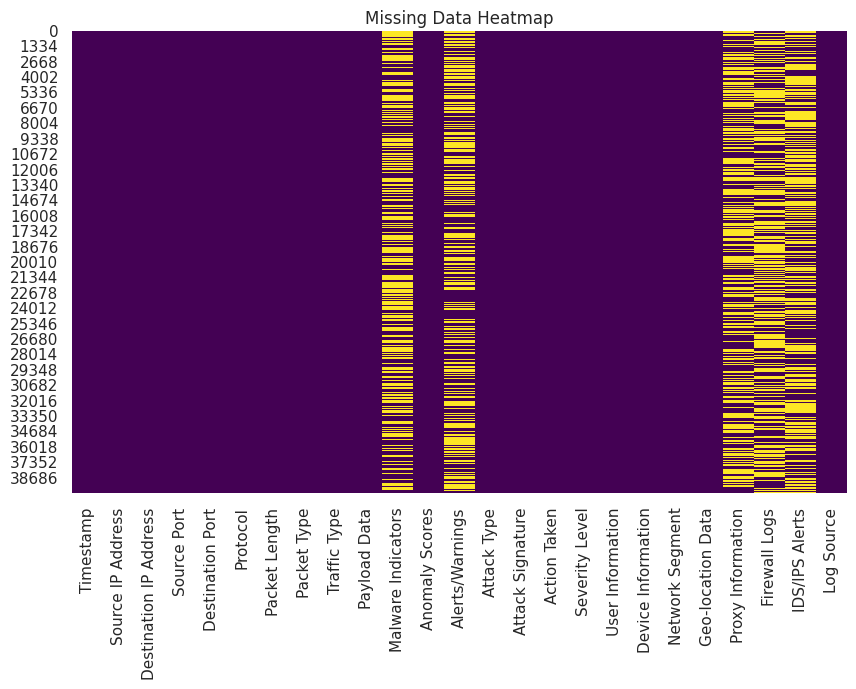

In [82]:
print("\nMissing values:")
print(dataset.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


In [83]:
missing_pct = round(dataset.isnull().sum()/len(dataset) * 100, 1)
print(missing_pct)

Timestamp                  0.0
Source IP Address          0.0
Destination IP Address     0.0
Source Port                0.0
Destination Port           0.0
Protocol                   0.0
Packet Length              0.0
Packet Type                0.0
Traffic Type               0.0
Payload Data               0.0
Malware Indicators        50.0
Anomaly Scores             0.0
Alerts/Warnings           50.2
Attack Type                0.0
Attack Signature           0.0
Action Taken               0.0
Severity Level             0.0
User Information           0.0
Device Information         0.0
Network Segment            0.0
Geo-location Data          0.0
Proxy Information         49.6
Firewall Logs             49.9
IDS/IPS Alerts            50.1
Log Source                 0.0
dtype: float64


#Detecting outliers

In [84]:
print(dataset.isnull().sum())

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


Source Port
int64
Destination Port
int64
Packet Length
int64
Anomaly Scores
float64


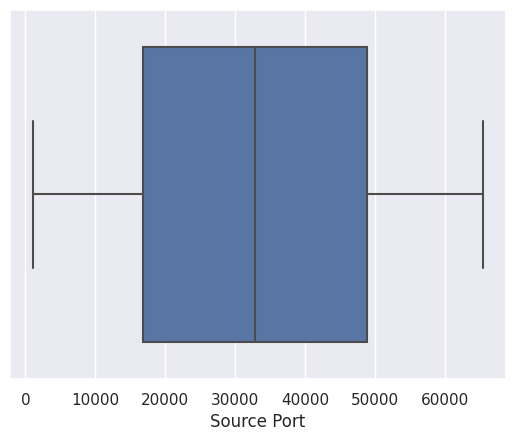

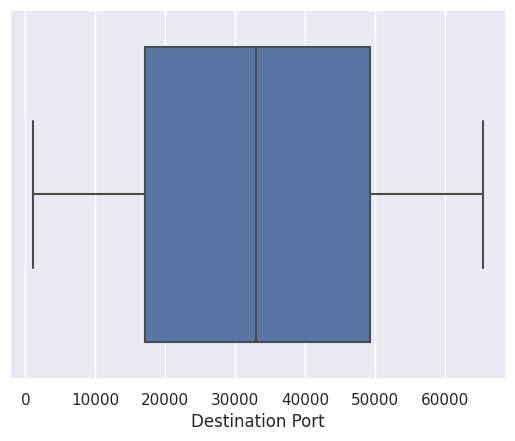

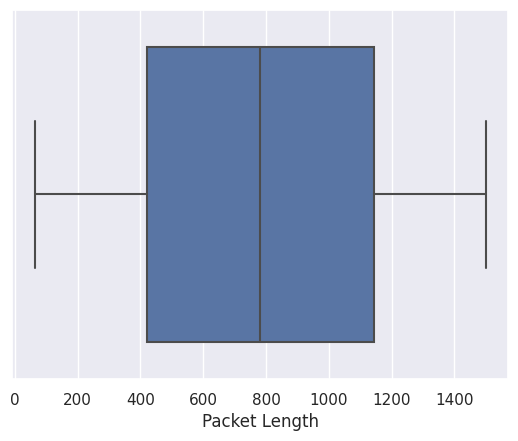

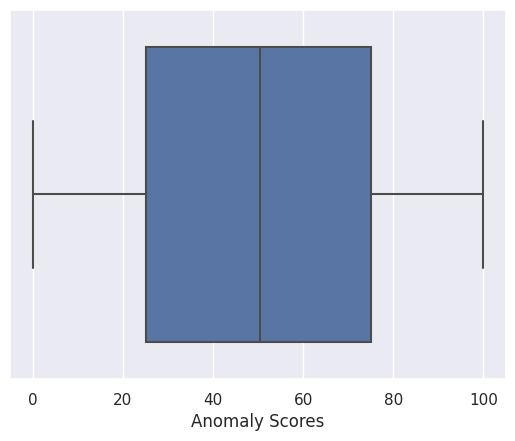

In [85]:
# for col_name in dataset.columns:
data = dataset.dtypes
for i, (key , value) in enumerate (data.items()):
  if value.name == 'int64' or value.name== 'float64':
    plt.figure(i)
    sns.boxplot(x=dataset[key])
    print(key)
    print(value)


In [86]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Source Port         32077.50
Destination Port    32192.25
Packet Length         723.00
Anomaly Scores         49.88
dtype: float64


<ipython-input-86-654295581107>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-86-654295581107>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)


In [87]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

<ipython-input-87-5a6a67347375>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]


(40000, 25)